In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel("glass.xlsx",sheet_name='glass')

In [4]:
df.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
199,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.00,7
153,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.00,0.00,3
93,1.51590,13.24,3.34,1.47,73.10,0.39,8.22,0.00,0.00,2
122,1.51687,13.23,3.54,1.48,72.84,0.56,8.10,0.00,0.00,2
51,1.51926,13.20,3.33,1.28,72.36,0.60,9.14,0.00,0.11,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
65,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.00,0.00,1
113,1.51892,13.46,3.83,1.26,72.55,0.57,8.21,0.00,0.14,2
145,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
112,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.00,0.00,2


In [5]:
# checking for null values, shape and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Visulization #

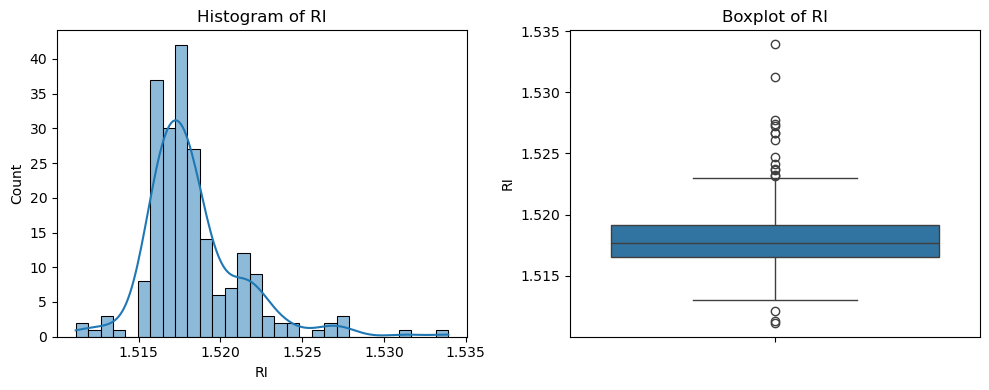

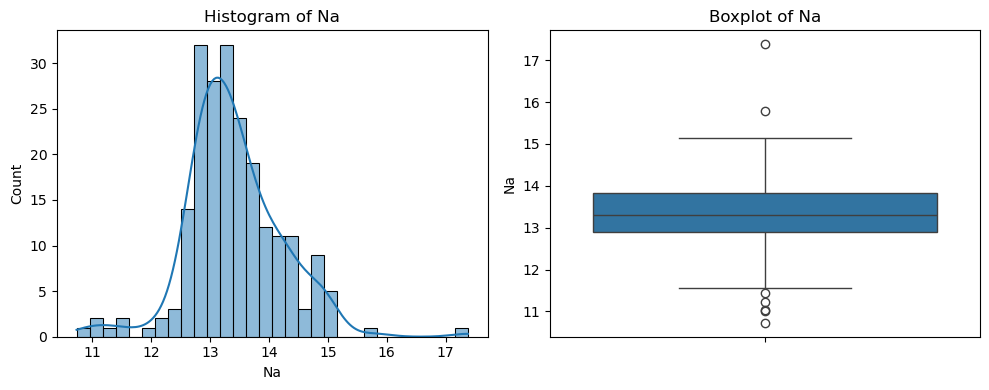

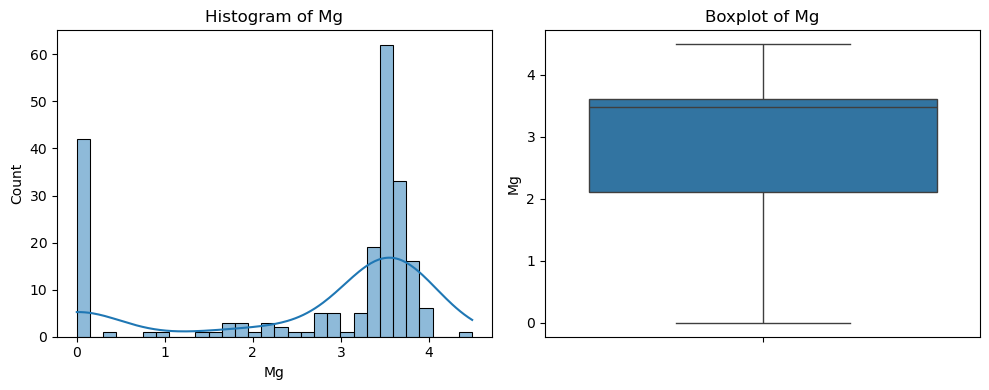

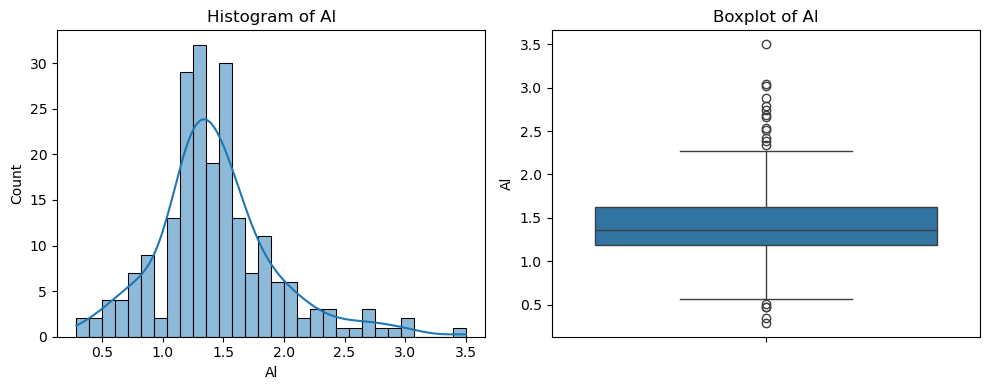

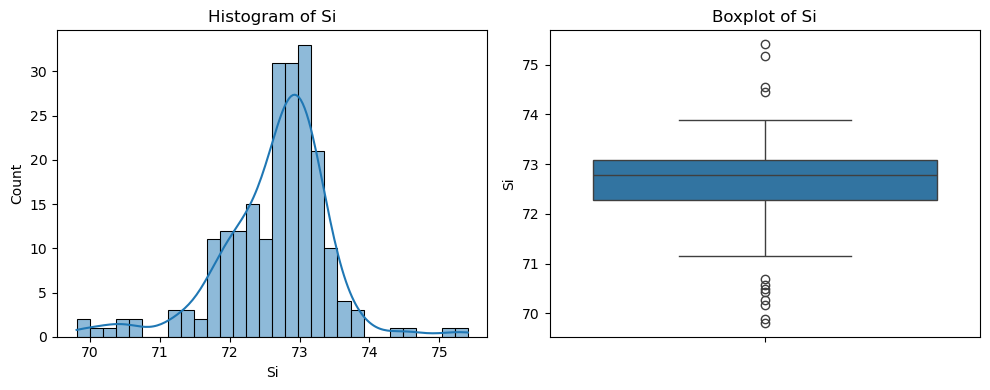

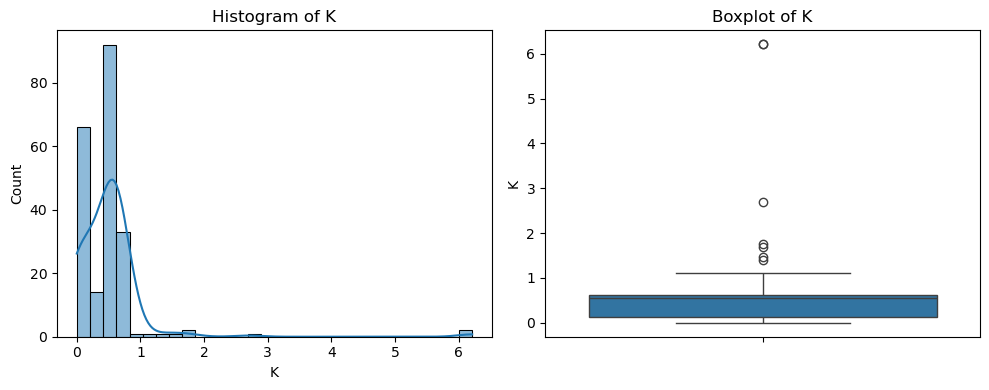

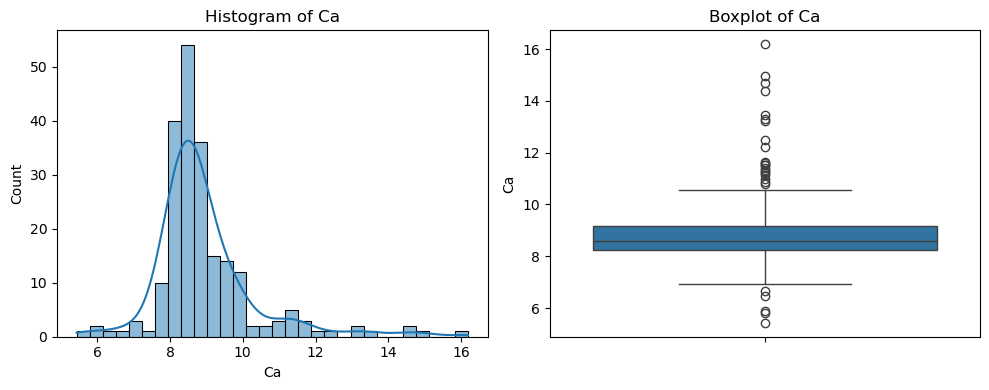

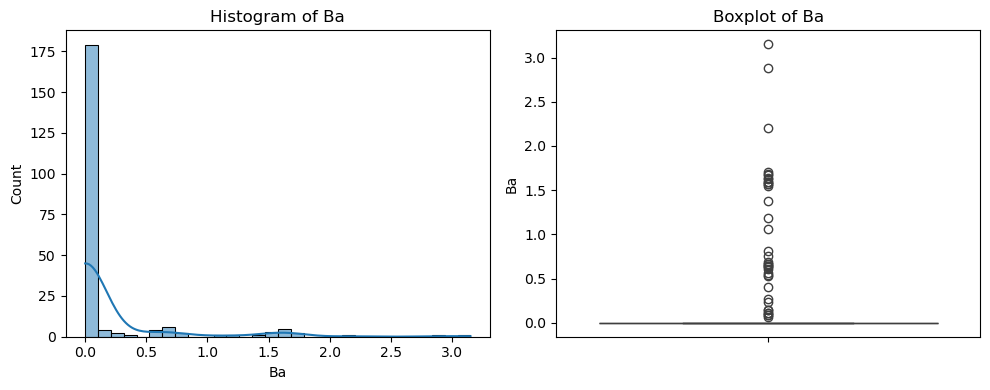

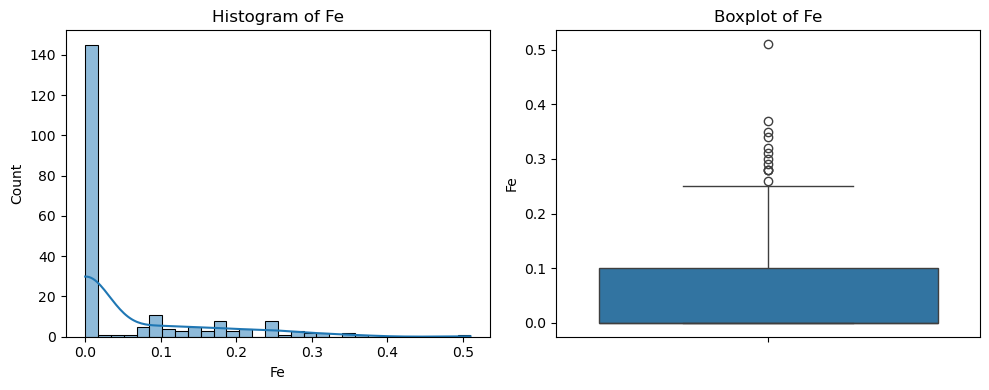

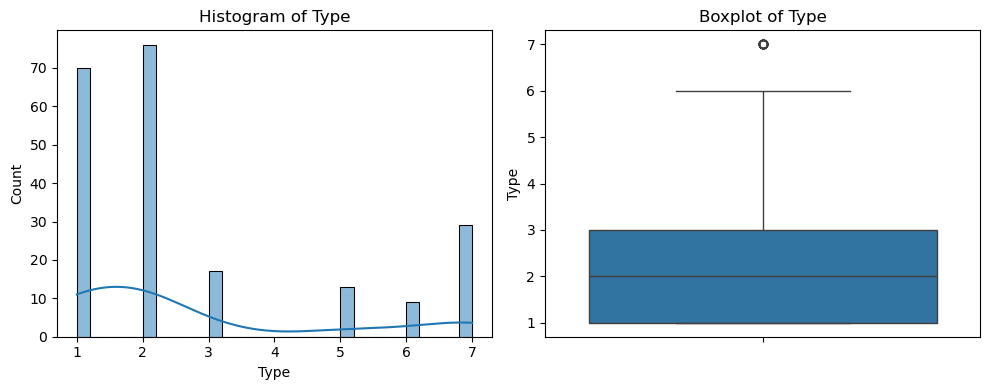

In [7]:

for i in df.columns:
    plt.figure(figsize=(10,4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[i], kde=True, bins=30)
    plt.title(f'Histogram of {i}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')

    plt.tight_layout()
    plt.show()

 # Pair plotting to check correation #

<Figure size 800x1200 with 0 Axes>

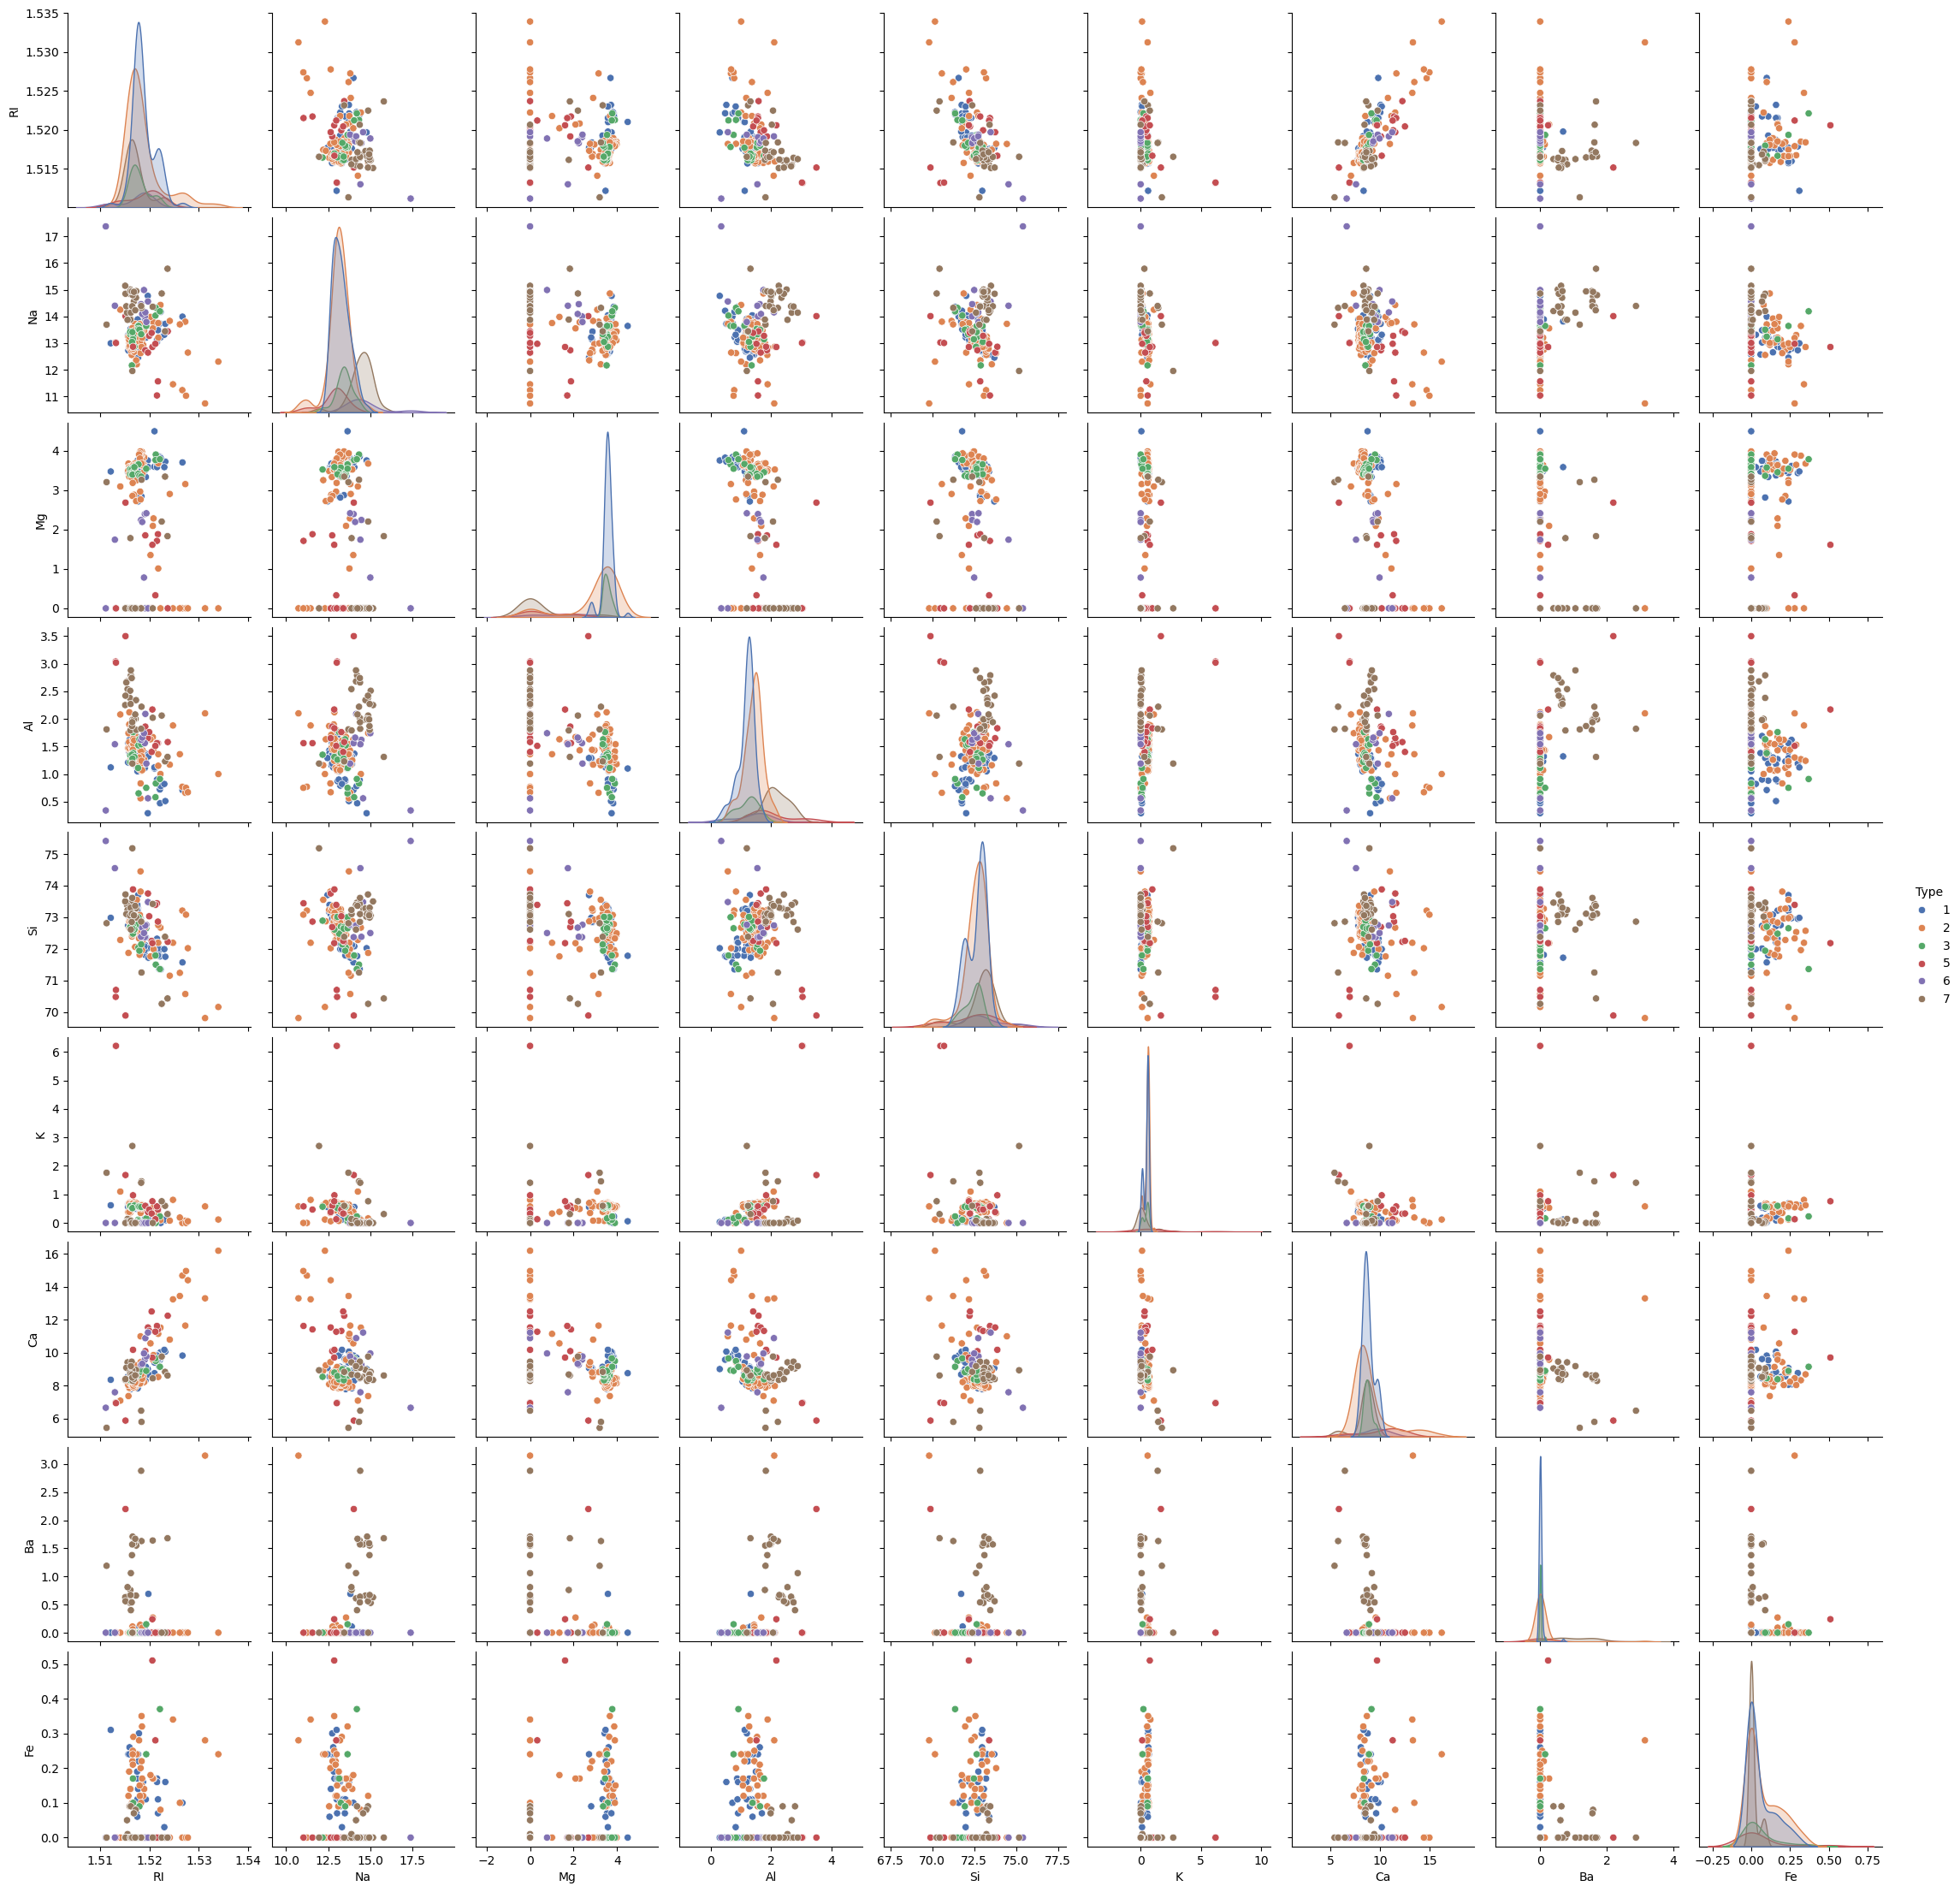

In [8]:

plt.figure(figsize=(8,12))
sns.pairplot(df,hue='Type', palette="deep")
plt.show()

# Splitting the data into Feuters and Traget#

In [9]:
X = df.drop("Type", axis=1)  # features
y = df["Type"]   # Target

In [10]:
#standerdizing the Features col
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
print(y.value_counts())

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


As we can see, the target column is imbalanced; therefore, we apply SMOTE to balance all the classes.

In [12]:
from imblearn.over_sampling import SMOTE

#SMOTE (Synthetic Minority Oversampling Technique) creates artificial samples for minority classes so that all classes are balanced.
                                                                            
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

In [13]:
y_resampled.value_counts()

Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64

# All the classes are now balanced.

In [14]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=5)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

In [16]:
y_pred = rf.predict(X_test)


Accuracy: 0.9130434782608695
Precision: 0.9240424430641822
Recall: 0.9130434782608695
F1 Score: 0.9110391232954952

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.65      0.76        17
           2       0.86      0.95      0.90        19
           3       0.71      1.00      0.83        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.91        92
   macro avg       0.91      0.92      0.91        92
weighted avg       0.92      0.91      0.91        92



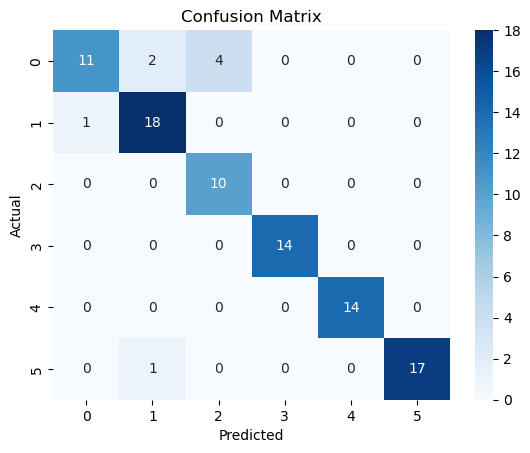

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Using bagging and Boosting Methods 

In [18]:
# Bagging 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)

from sklearn.metrics import accuracy_score
bag_acc = accuracy_score(y_test, y_pred_bag)
print("Bagging Accuracy:", bag_acc)


Bagging Accuracy: 0.9347826086956522


In [19]:
# Boosting ( Using Gradient Boosting )
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

gb_acc = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_acc)


Gradient Boosting Accuracy: 0.9456521739130435


In [20]:
#  Comparing Accuracy for all the models 
rf_acc = accuracy_score(y_test, y_pred)
print("\nModel Performance Comparison:")
print(f"Random Forest Accuracy: {rf_acc:.2f}")
print(f"Bagging Accuracy:       {bag_acc:.2f}")
print(f"Gradient Boosting Accuracy: {gb_acc:.2f}")


Model Performance Comparison:
Random Forest Accuracy: 0.91
Bagging Accuracy:       0.93
Gradient Boosting Accuracy: 0.95


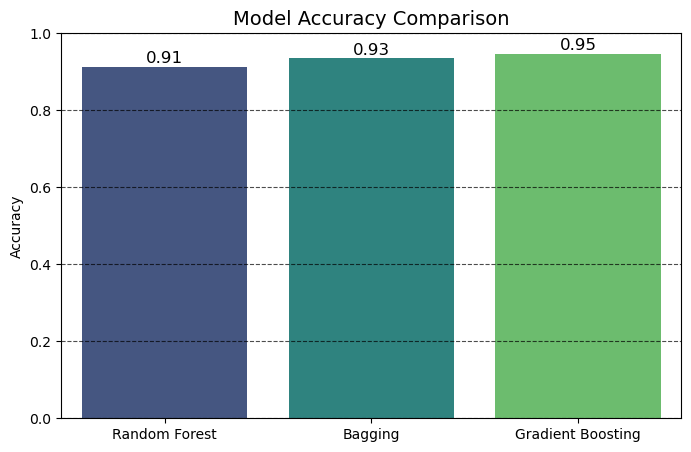

In [21]:
# Visualization of model accuracies
models = ['Random Forest', 'Bagging','Gradient Boosting']
accuracies = [rf_acc, bag_acc, gb_acc]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7,c='black')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01 , f"{acc:.2f}", ha='center', fontsize=12)
plt.show()


# Explaination 

1. **Explain Bagging and Boosting methods. How is it different from each other.**

Bagging and Boosting Explained

Bagging (Bootstrap Aggregating) and Boosting are both ensemble learning methods that combine multiple models (usually decision trees) to improve accuracy and reduce errors, but they do so in different ways.

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

 **Bagging (Bootstrap Aggregating):**
Bagging builds multiple independent models in parallel using randomly sampled subsets of the training data (with replacement).
Each model learns separately, and their predictions are combined (usually by voting or averaging).
It helps to reduce variance and avoid overfitting.
 Example: Random Forest.
///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

**Boosting:**
Boosting builds models sequentially, where each new model focuses on correcting the errors made by the previous ones.
It assigns more weight to the misclassified samples, so later models learn harder cases.
It helps to reduce bias and improve accuracy, but may overfit if not tuned properly.

 Examples: AdaBoost, Gradient Boosting, XGBoost.

2. Explain how to handle imbalance in the data.

When the dataset is imbalanced, the model tends to favor the majority class. To handle this, we can balance the data using techniques like SMOTE (oversampling) or undersampling, or adjust class weights in the model. We should also use proper metrics like F1-score and ROC-AUC instead of just accuracy to evaluate performance.